# Data Preprocessing & Cleaning
* Importing and exploring datasets.
* Handling missing values and outliers.
* Data normalization and scaling.
* Feature selection and engineering.
* Hands-on: Cleaning a real-world dataset.


# 1. Importing and Exploring Datasets
Before working with data, we need to import it and understand its structure. This involves checking data types, missing values, basic statistics, and data distribution.

In [12]:
# importing the data from the csv file using pandas

In [13]:
# number of rows and columns

In [14]:
# columns

In [15]:
 # Checking for missing values

In [16]:
 # Descriptive statistics

## Key Takeaways
* .head() gives an overview of the data.
* .shape tells the number of rows and columns.
* .describe() provides statistical summaries.
* .isnull().sum() helps identify missing values.
* .dtypes shows the types of variables.

# 2. Handling Missing Values and Outliers
Missing values and outliers can distort the results of a machine learning model. We need to either remove or impute missing values and handle outliers effectively.

* Handling Missing Values
* Remove missing values if they are too many.
* Impute missing values using mean, median, mode, or advanced techniques.

In [17]:
import numpy as np 
import pandas as pd

data = pd.read_csv('Data\employees.csv')
data

<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
C:\Users\USER\AppData\Local\Temp\ipykernel_20084\4073876245.py:4: SyntaxWarning: invalid escape sequence '\e'
  data = pd.read_csv('Data\employees.csv')


,Name,Age,Salary,Department,Experience (Years)
0,Alice,25.0,50000.0,HR,1.0
1,Bob,NaN,60000.0,IT,3.0
2,Charlie,30.0,NaN,Finance,5.0
3,David,45.0,80000.0,IT,10.0
4,Eve,NaN,75000.0,HR,7.0
5,Frank,28.0,NaN,NaN,NaN
6,Grace,35.0,90000.0,Finance,8.0
7,Hannah,NaN,65000.0,HR,6.0
8,NaN,40.0,NaN,IT,NaN
9,Jack,50.0,100000.0,NaN,15.0


In [18]:
print(data.isnull().sum())


Name                  1
Age                   3
Salary                3
Department            2
Experience (Years)    2
dtype: int64


In [19]:
data.loc[:, "Age"] = data["Age"].fillna(data["Age"].mean())  # Fill numeric NaNs with mean
data["Age"] = data["Age"].astype(int)

data.loc[:, "Salary"] = data["Salary"].fillna(data["Salary"].mean())  # Fill numeric NaNs with mean
# data["Salary"] = data["Salary"].astype(int)

data.loc[:, "Experience (Years)"] = data["Experience (Years)"].fillna(data["Experience (Years)"].mean())  # Fill numeric NaNs with mean
data["Experience (Years)"] = data["Experience (Years)"].astype(int)
data


,Name,Age,Salary,Department,Experience (Years)
0,Alice,25,50000.000000,HR,1
1,Bob,36,60000.000000,IT,3
2,Charlie,30,74285.714286,Finance,5
3,David,45,80000.000000,IT,10
4,Eve,36,75000.000000,HR,7
5,Frank,28,74285.714286,NaN,6
6,Grace,35,90000.000000,Finance,8
7,Hannah,36,65000.000000,HR,6
8,NaN,40,74285.714286,IT,6
9,Jack,50,100000.000000,NaN,15


In [20]:
# Fill NaN values for all numeric columns at once
data.loc[:, ["Age", "Salary", "Experience (Years)"]] = data.loc[:, ["Age", "Salary", "Experience (Years)"]].apply(lambda x: x.fillna(x.mean()))

# Convert specific columns to integers
data = data.astype({"Age": int, "Experience (Years)": int})  

# Print the cleaned DataFrame
data

,Name,Age,Salary,Department,Experience (Years)
0,Alice,25,50000.000000,HR,1
1,Bob,36,60000.000000,IT,3
2,Charlie,30,74285.714286,Finance,5
3,David,45,80000.000000,IT,10
4,Eve,36,75000.000000,HR,7
5,Frank,28,74285.714286,NaN,6
6,Grace,35,90000.000000,Finance,8
7,Hannah,36,65000.000000,HR,6
8,NaN,40,74285.714286,IT,6
9,Jack,50,100000.000000,NaN,15


In [21]:
data['Department'] = data["Department"].fillna(data["Department"].mode()[0])  # Fill categorical NaNs with mode
data["Name"] = data["Name"].fillna(data["Name"].mode()[0])
data

,Name,Age,Salary,Department,Experience (Years)
0,Alice,25,50000.000000,HR,1
1,Bob,36,60000.000000,IT,3
2,Charlie,30,74285.714286,Finance,5
3,David,45,80000.000000,IT,10
4,Eve,36,75000.000000,HR,7
5,Frank,28,74285.714286,HR,6
6,Grace,35,90000.000000,Finance,8
7,Hannah,36,65000.000000,HR,6
8,Alice,40,74285.714286,IT,6
9,Jack,50,100000.000000,HR,15


In [22]:
# solving nan values
data1 = data.dropna()
data1

,Name,Age,Salary,Department,Experience (Years)
0,Alice,25,50000.000000,HR,1
1,Bob,36,60000.000000,IT,3
2,Charlie,30,74285.714286,Finance,5
3,David,45,80000.000000,IT,10
4,Eve,36,75000.000000,HR,7
5,Frank,28,74285.714286,HR,6
6,Grace,35,90000.000000,Finance,8
7,Hannah,36,65000.000000,HR,6
8,Alice,40,74285.714286,IT,6
9,Jack,50,100000.000000,HR,15


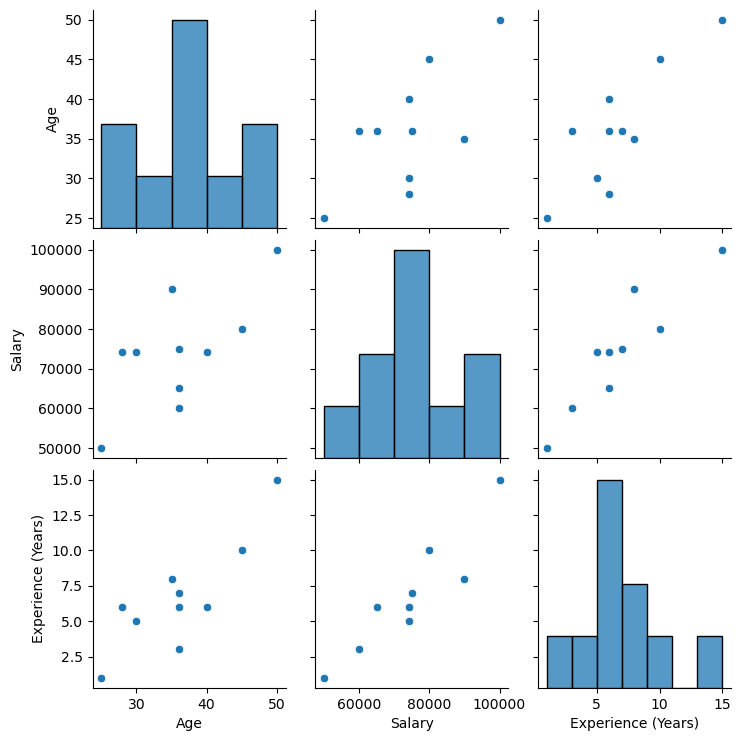

In [33]:
# Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data)
plt.show()

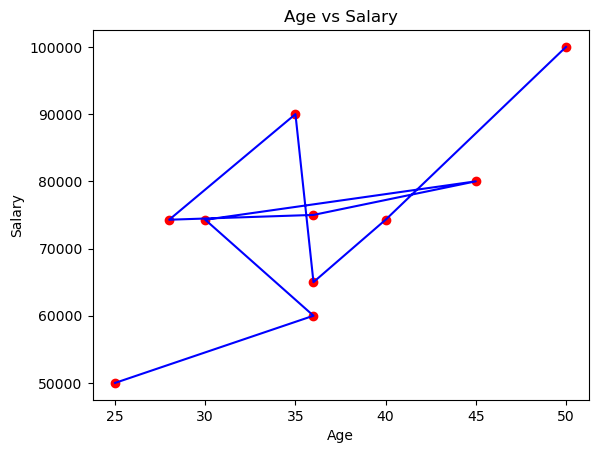

In [36]:
age =data1['Age']
salary = data1['Salary']

plt.scatter(age, salary, color='red')
plt.plot(age, salary, color='blue')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()